Length of things should be equal: 91 = 91 = 91 = 91


C:\Users\Scopazzi\AppData\Local\Temp\ipykernel_12560\1631776628.py:316: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


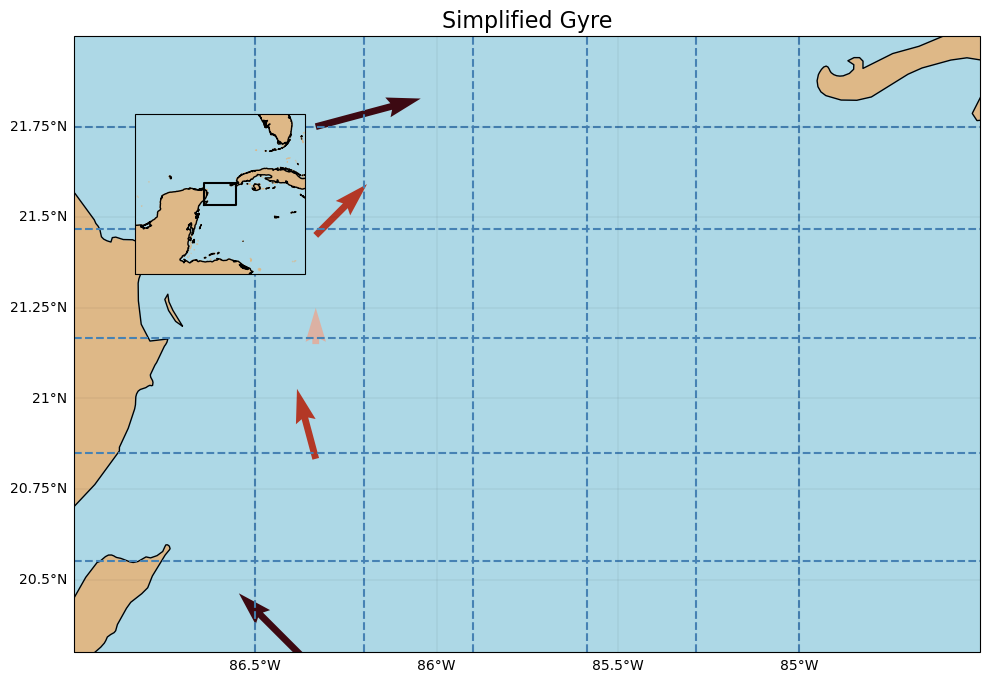

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import glob as glob
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.crs as ccrs
# import cool_maps.plot as cplt
import cmocean.cm as cmo

start_lon   = -86.5
end_lon     = -85
start_lat   = 20.25
end_lat     = 21.76
filename = 'sfmc_simpleGyre.xml'
wheresave = '../SFMC_script/'
complete_filename = os.path.join(wheresave,filename)

# for longitude
def decimal_degrees_to_degrees_minutes(start_lon,end_lon):
    range_str = []
    unique_strings = []
    lon_map = []

    range_run = np.arange(start_lon, end_lon, 0.01) # range of numbers with 0.01 steps

    for i in range_run:
        deg = int(i)
        decimal_part = abs(i - deg)
        min = int(decimal_part * 60)
        # Formatting minutes to have leading zero if necessary
        min_str = f'{min:02d}'  # This ensures minutes are represented with leading zero if < 10
        string = f'{deg}{min_str}'

        # str = f'{deg}{min}'
        range_str.append(string)

    for string in range_str:
        if string not in unique_strings:
            unique_strings.append(string)
    
    # longitude strings to integers for mapping later
    for lon_str in unique_strings:
        londegstr = lon_str[1:3]  # Extracting degrees part without the negative sign
        lonminstr = lon_str[3:]   # Extracting minutes part for negative longitude
        lon_maploop = - (int(londegstr) + (int(lonminstr) / 60))

        lon_map.append(lon_maploop)

    return unique_strings,lon_map

# for latitude
def latitude_parse(start_lat,end_lat):
    range_str = []
    unique_strings = []
    lon_map = []

    range_run = np.arange(start_lat, end_lat, 0.01) # range of numbers with 0.01 steps

    for i in range_run:
        deg = int(i)
        decimal_part = abs(i - deg)
        min = int(decimal_part * 60)
        # Formatting minutes to have leading zero if necessary
        min_str = f'{min:02d}'  # This ensures minutes are represented with leading zero if < 10
        string = f'{deg}{min_str}'
        # print(string)
        # str = f'{deg}{min}'
        range_str.append(string)

    for string in range_str:
        if string not in unique_strings:
            unique_strings.append(string)
    
    # longitude strings to integers for mapping later
    for lon_str in unique_strings:
        londegstr = lon_str[0:2]  # Extracting degrees part without the negative sign
        lonminstr = lon_str[2:]   # Extracting minutes part for negative longitude
        # print(lonminstr)
        lon_maploop = (int(londegstr) + (int(lonminstr) / 60))
        lon_map.append(lon_maploop)

    return unique_strings,lon_map

# sections, 20, 20, 20, 15, 16
sec0 = 18
sec1 = 18
sec2 = 19
sec3 = 18
sec4 = 18

pltsec0 = 0
pltsec1 = sec0+sec1-1
pltsec2 = sec0+sec1+sec2-1
pltsec3 = sec0+sec1+sec2+sec3-1
pltsec4 = sec0+sec1+sec2+sec3+sec4-1

# west0 = [45]*sec0
# west1 = [90]*sec1
# west2 = [135]*sec2
# west3 = [180]*sec3
# west4 = [225]*sec4
# water_dir_deg = west0+west1+west2+west3+west4

# lon sec 0
area0_0 = [315]*sec0
area0_1 = [345]*sec1
area0_2 = [0]*sec2
area0_3 = [45]*sec3
area0_4 = [75]*sec4
area0_water_dir_deg = area0_0 + area0_1 + area0_2 + area0_3 + area0_4

area0_rads = []
for i in area0_water_dir_deg:
    rads_loop = math.radians(i)
    area0_rads.append(rads_loop)

# lon sec 1
area1_0 = [315]*sec0
area1_1 = [345]*sec1
area1_2 = [0]*sec2
area1_3 = [45]*sec3
area1_4 = [75]*sec4
area1_water_dir_deg = area1_0 + area1_1 + area1_2 + area1_3 + area1_4

area1_rads = []
for i in area0_water_dir_deg:
    rads_loop = math.radians(i)
    area1_rads.append(rads_loop)

# lon sec 2
area2_0 = [315]*sec0
area2_1 = [345]*sec1
area2_2 = [0]*sec2
area2_3 = [45]*sec3
area2_4 = [75]*sec4
area2_water_dir_deg = area2_0 + area2_1 + area2_2 + area2_3 + area2_4

area2_rads = []
for i in area0_water_dir_deg:
    rads_loop = math.radians(i)
    area2_rads.append(rads_loop)

# lon sec 3
area3_0 = [315]*sec0
area3_1 = [345]*sec1
area3_2 = [0]*sec2
area3_3 = [45]*sec3
area3_4 = [75]*sec4
area3_water_dir_deg = area3_0 + area3_1 + area3_2 + area3_3 + area3_4

area3_rads = []
for i in area0_water_dir_deg:
    rads_loop = math.radians(i)
    area3_rads.append(rads_loop)

# lon sec 4
area4_0 = [315]*sec0
area4_1 = [345]*sec1
area4_2 = [0]*sec2
area4_3 = [45]*sec3
area4_4 = [75]*sec4
area4_water_dir_deg = area4_0 + area4_1 + area4_2 + area4_3 + area4_4

area4_rads = []
for i in area0_water_dir_deg:
    rads_loop = math.radians(i)
    area4_rads.append(rads_loop)

speed0 = [0.6]*sec0
speed1 = [0.4]*sec1
speed2 = [0.2]*sec2
speed3 = [0.4]*sec3
speed4 = [0.6]*sec4

water_speed = speed0 + speed1 + speed2 + speed3 + speed4

lon_range_str,lon_map = decimal_degrees_to_degrees_minutes(start_lon,end_lon)
loopnum = len(lon_range_str)
# lat_map = [21]*len(lon_map)

lat_range_str,lat_map = latitude_parse(start_lat,end_lat)

print(f'Length of things should be equal: {len(lon_map)} = {len(lon_range_str)} = {len(water_speed)} = {len(lat_map)}')

lon_ext = [-86.5,-85]
lat_ext = [21.5,20.8] 

# Create a map using PlateCarree projection (latitude and longitude)
fig, ax = plt.subplots(figsize=(10,20),subplot_kw={'projection': ccrs.PlateCarree()})
# fig, ax = cplt.create(extent, proj=ccrs.Mercator(), bathymetry=False, figsize=(10,20))

buffer = 0.5
# Set the extent of the map based on the trackline data
ax.set_extent([min(lon_ext) - buffer,
                max(lon_ext) + buffer, 
                min(lat_ext) - buffer, 
                max(lat_ext) + buffer
                ])

# Add coastlines
ax.coastlines()
ax.add_feature(cfeature.LAND, color='burlywood') # I like this color
ax.add_feature(cfeature.OCEAN, color='lightblue')

gl = ax.gridlines(draw_labels=True, linewidth=0.1, color='black', alpha=0.5, linestyle='-')
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# remove labels from ax.gridlines
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# remove labels from cartopy
ax.set_xticklabels([])
ax.set_yticklabels([])

color = 'steelblue'
# sections, 20, 20, 20, 15, 16
ax.axvline(lon_map[sec0], color=color, linestyle='--')
ax.axvline(lon_map[sec0+sec1], color=color, linestyle='--')
ax.axvline(lon_map[sec0+sec1+sec2], color=color, linestyle='--')
ax.axvline(lon_map[sec0+sec1+sec2+sec3], color=color, linestyle='--')
ax.axvline(lon_map[sec0+sec1+sec2+sec3+sec4-1], color=color, linestyle='--')

# Define colormap
cmap = cmo.amp
# cmap = cmap.reversed()

# Define the range of values corresponding to the colormap
pltspeed_values = [0.1, 0.3, 0.4, 0.6]  

# # Create a scalar mappable for colorbar
norm = plt.Normalize(min(pltspeed_values), max(pltspeed_values))
scalar_mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
scalar_mappable.set_array([])  # Set an empty array

scale = 5 # was 3.1 bigger num is smaller

# Convert direction and magnitude to components (u, v)
area0_u_list = []  # Empty list to store u components
area0_v_list = []  # Empty list to store v components

for speed, rad in zip(water_speed, area0_rads):
    # Adjust the angles for the quiver plot if needed
    adjusted_rads = [np.pi / 2 - angle for angle in area0_rads]
    
    u = speed * np.cos(adjusted_rads)
    v = speed * np.sin(adjusted_rads)
    area0_u_list.append(u)
    area0_v_list.append(v)
    
# Plot the quiver plots using colormap
quiver0 = ax.quiver(lon_map[pltsec0+10], lat_map[pltsec0], area0_u_list[pltsec0][pltsec0], area0_v_list[pltsec0][pltsec0],
                    angles='xy', color=cmap(norm(0.6)), transform=ccrs.PlateCarree(), scale=scale)
quiver1 = ax.quiver(lon_map[pltsec0+10], lat_map[pltsec1], area0_u_list[pltsec1][pltsec1], area0_v_list[pltsec1][pltsec1],
                    angles='xy', color=cmap(norm(0.4)), transform=ccrs.PlateCarree(), scale=scale)
quiver2 = ax.quiver(lon_map[pltsec0+10], lat_map[pltsec2], area0_u_list[pltsec2][pltsec2], area0_v_list[pltsec2][pltsec2],
                    angles='xy', color=cmap(norm(0.2)), transform=ccrs.PlateCarree(), scale=scale)
quiver3 = ax.quiver(lon_map[pltsec0+10], lat_map[pltsec3], area0_u_list[pltsec3][pltsec3], area0_v_list[pltsec3][pltsec3],
                    angles='xy', color=cmap(norm(0.4)), transform=ccrs.PlateCarree(), scale=scale)
quiver4 = ax.quiver(lon_map[pltsec0+10], lat_map[pltsec4], area0_u_list[pltsec4][pltsec4], area0_v_list[pltsec4][pltsec4],
                    angles='xy', color=cmap(norm(0.6)), transform=ccrs.PlateCarree(), scale=scale)

plt.title('Simplified Gyre',fontsize=16)
# this at end for bottom of legend
ax.axvline(lon_map[0], color='steelblue', linestyle='--',label='Boundaries')

# locator map
# left, bottom, width, height
ax_locator = fig.add_axes([0.14, 0.49, 0.17, 0.17], projection=ccrs.PlateCarree())

big_extent_buff = 6
big_extent = ([min(lon_ext) - big_extent_buff,
                max(lon_ext) + big_extent_buff,
                min(lat_ext) - big_extent_buff,
                max(lat_ext) + big_extent_buff])
# set extent for the locator map
ax_locator.set_extent(big_extent)
ax_locator.add_feature(cfeature.COASTLINE, edgecolor='black')
ax_locator.add_feature(cfeature.OCEAN, color='lightblue')
ax_locator.add_feature(cfeature.LAND, color='burlywood')

# ax.scatter(lon_glider, lat_glider, marker='.', s=20, alpha=0.5, cmap='cool', transform=ccrs.PlateCarree())
# ax.plot(lon_glider_e, lat_glider_e, linewidth=1.5, color='black', transform=ccrs.PlateCarree(),label='Due east')
# ax.plot(lon_glider_se, lat_glider_se, linewidth=1.5, color='red', transform=ccrs.PlateCarree(),label='Southeast')
# ax.plot(lon_glider_spec1, lat_glider_spec1, linewidth=1.5, color='forestgreen', transform=ccrs.PlateCarree(),label='Backseat Driver')

## Box around actual figure region
ax_locator.plot([min(lon_ext) - buffer, min(lon_ext) - buffer,  max(lon_ext) + buffer, max(lon_ext) + buffer, min(lon_ext) - buffer] , 
        [min(lat_ext) - buffer, max(lat_ext) + buffer, max(lat_ext) + buffer, min(lat_ext) - buffer, min(lat_ext) - buffer], color='black',linewidth=1.5,  transform=ccrs.PlateCarree())

ax.set_extent([min(lon_ext) - buffer,
                max(lon_ext) + buffer, 
                min(lat_ext) - buffer, 
                max(lat_ext) + buffer
                ])

# ax.legend(loc='lower right')
# bbox_time = dict(boxstyle='square,pad=0.5', facecolor='white', alpha=0.5)  # Semi-transparent white box
# ax.text(-85.2,21.65,f'{t_e}',fontsize=12,bbox=bbox_time)     # due east time
# ax.text(-85.17,21.1,f'{t_se}',fontsize=12,bbox=bbox_time)     # southeast time
# ax.text(-85,21.4,f'{t_spec1}',fontsize=12,bbox=bbox_time) # spec1 time

ax.axhline(lat_map[sec0], color=color, linestyle='--')
ax.axhline(lat_map[sec0+sec1], color=color, linestyle='--')
ax.axhline(lat_map[sec0+sec1+sec2], color=color, linestyle='--')
ax.axhline(lat_map[sec0+sec1+sec2+sec3], color=color, linestyle='--')
ax.axhline(lat_map[sec0+sec1+sec2+sec3+sec4-1], color=color, linestyle='--')

plt.tight_layout() # doesn't seem to work?
plt.savefig('attempt_at_incorporating_latitude.png')
# plt.savefig(os.path.join(wheresave,'lat_lon_gyre_try.png'), dpi=300, bbox_inches='tight')
# filename = os.path.join(wheresave,'sendWaterSpeedDir.png')
# print(f'plot_fzb saved: {filename}')